# 泰坦尼克号数据的分析项目
&emsp;&emsp;泰坦尼克号（RMS Titanic，又称铁达尼号）是一艘奥林匹克级邮轮，于1912年4月处女航时撞上冰山后沉没。泰坦尼克号由位于爱尔兰岛贝尔法斯特的哈兰德与沃尔夫造船厂兴建，是当时最大的客运轮船。在它的处女航中，泰坦尼克号从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划中的目的地为美国纽约。1912年4月14日，船上时间夜里11时40分，泰坦尼克号撞上冰山；4月15日凌晨2时20分，船体断裂成两截后沉入大西洋，船上1500多人丧生。泰坦尼克号海难为和平时期死伤人数最惨重的海难之一。（摘至百度百科）

&emsp;&emsp;本文分析的数据：泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。这个数据集来自 Kaggle，该网站上能够查看这个数据集的详细描述。

泰坦尼克的2224成员中有1500多人在事故中丧生，有哪些因素会让船上的人生还率更高？我们先来看看数据：

In [1]:
# 引入 numpy 和 pandas 模块
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
titanic_data = pd.DataFrame(pd.read_csv('titanic-data.csv'))
# 查看下数据样本的前3行数据
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



数据集的字段注释

字段 | 注释 | 字段 | 注释 
---|---|---|---
PassengerId | 乘客ID | Survived | 存活(1存活、0死亡)
Pclass | 乘客等级(1/2/3等舱位) | Name | 乘客姓名
Sex | 性别 | Age | 年龄
SibSp | 堂兄弟/妹个数 | Parch | 父母与小孩个数
Ticket | 船票信息 | Fare | 票价
Cabin | 客舱     |       Embarked | 登船港口

根据现有的数据来看：
- PassengerId是乘客ID应该类似于票根号，可能分析的意义不大，暂时忽略。
- Survived是本文分析生还率最重要的数据。
- Pclass是船舱等级，根据泰坦尼克号不同等级享受的待遇是天壤之别的，高等级的船舱拥有更多的福利；**船舱等级越高，生存率越高？**
- Sex和Age，在逃生时是否遵循老人儿童女士优先，**性别、年龄跟生存率的关系？**
- SibSp和Parch，逃生船是有限的，**堂兄弟/妹个数或者父母与小孩个数与生存率的关系？**
- Ticket，该数据可能分析的意义不大，暂时忽略。
- Cabin，客轮是撞了冰山海水从船底涌入，所以在底层的客舱逃生时间应该比较短，或者有些客舱离逃生出口比较远等等。**哪些客舱的生存率高？**
- Embarked，该数据可能分析的意义不确定，不同的登船港口，似乎不能说明什么，暂时忽略。

In [2]:
# 查看下数据样本的相关信息
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


通过info()可以得知，Age、Cabin、Embarked存在数据缺失。

Cabin的数据实在太少，暂时不知道如何填充，暂时忽略。Embarked是登船港口，根据之前的分析，暂时忽略。有Age信息的数据只有714，但是为了能够使用更多的数据，这里采用现有的714名有的Age数据的平均值作为余下的177条数据的Age值。

In [3]:
# 计算714名有的Age数据的平均值
mean_age_714 = titanic_data['Age'].mean()
print "mean_age_714:", mean_age_714
# 填充平均值
titanic_data['Age'].fillna(mean_age_714,inplace=True)

mean_age_714: 29.6991176471


In [4]:
# 查看下Sex的分类
titanic_data.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Sex的数据类型是object，又根据Sex的分类得知，性别可以转换为男为1、女为0；如果男女人数相等，那么mean=0.5，如果女士比男士多，那么则mean趋于0，反之趋于1。

In [5]:
# 男为1，女为0
titanic_data['Sex'].replace(['male','female'],[1,0],inplace=True)

In [6]:
# 查看下数据样本的相关信息
titanic_data.info()
# 查看数据集的 统计汇总
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 保存已经处理的数据
titanic_data.to_csv('titanic-data.v1.csv')

### 从已处理的数据统计汇总信息中，可以得出以下结论：
- Survived.mean=0.38，Survived的值为1或0，所以这次事故中乘客的存活率为0.38
- Sex.mean=0.65, 说明男性乘客较多。
- Age.min最小年龄的乘客不到1岁，而Age.max最大年龄的乘客为80岁，乘客平均年龄为29岁
- Pclass.mean=2.3，舱位分为1/2/3等，而mean大于2，所以2、3等舱位数量最多

### 针对该数据样本数据探索

**a1**.年龄最小不到1岁的乘客和年龄最大80岁的乘客，他们是否在事故中幸存下来？

In [8]:
age_for_min = titanic_data['Age'].argmin()
age_for_max = titanic_data['Age'].argmax()
# print age_for_min, age_for_max
age_min_Survived = titanic_data.iloc[[age_for_min]]
age_max_Survived = titanic_data.iloc[[age_for_max]]
print age_min_Survived['Survived']
print age_max_Survived['Survived']

803    1
Name: Survived, dtype: int64
630    1
Name: Survived, dtype: int64


年龄最大和最小的两位乘客在那次事故中幸存。

**a2**.船舱等级越高，生存率越高？

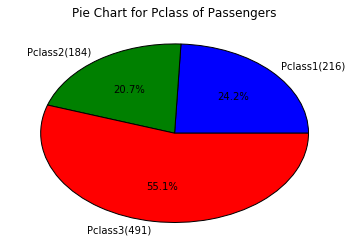

In [9]:
# 891名乘客中，舱位1/2/3等，分别各是多少？所占比例？
by_Pclass = titanic_data.groupby(['Pclass'])['Pclass'].count()
plt.pie(by_Pclass, labels = ['Pclass1({})'.format(by_Pclass[1]),'Pclass2({})'.format(by_Pclass[2]), 'Pclass3({})'.format(by_Pclass[3])], autopct='%.1f%%')
plt.title('Pie Chart for Pclass of Passengers')

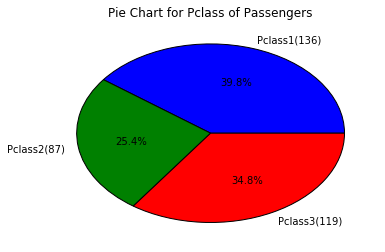

In [10]:
# 生存的乘客中，舱位1/2/3等，分别各是多少？所占比例？
by_Pclass = titanic_data[titanic_data.Survived==1].groupby(['Pclass'])['Pclass'].count()
plt.pie(by_Pclass, labels = ['Pclass1({})'.format(by_Pclass[1]),'Pclass2({})'.format(by_Pclass[2]), 'Pclass3({})'.format(by_Pclass[3])], autopct='%.1f%%')
plt.title('Pie Chart for Pclass of Passengers')

1/2/3等舱位数量分别为216、184、491，如上图所示。

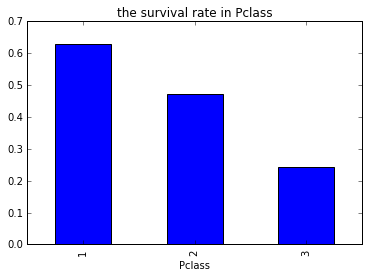

In [11]:
# 定义一个生存率的绘柱状图的函数
def survival_rate(key):
    plt.title("the survival rate in " + key)
    titanic_data.groupby([key])['Survived'].mean().plot(kind = 'bar')
# 根据 Pclass乘客等级 绘制柱状图
survival_rate('Pclass')

由上图得知，**乘客等级越高，生存率越高。**

**a3**.性别、年龄跟生存率的关系？

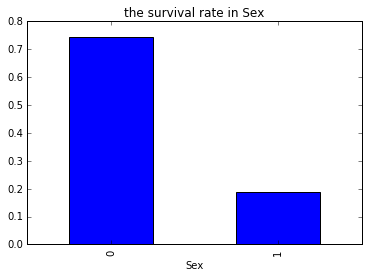

In [12]:
# 根据 Sex性别 绘制柱状图
# 注：数据已处理，0为女性，1为男性
survival_rate('Sex')

由上图得知，**女性的生存率远高于男性**，说明逃生时执行了女士优先。

现在要探索年龄与生存率的关系，由于不知道当时评判幼年、中年、老年等年龄段的划分，已知最大年龄为80岁则不妨设置5年为年龄组距，暂且查看现有的年龄数据的直方图：

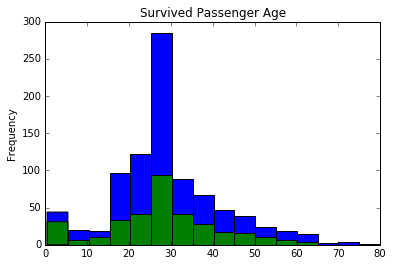

In [13]:
# 891名乘客的年龄直方图
# plt.subplot2grid((1,2),(0,0))
titanic_data['Age'].plot.hist(bins=16,title='All Passenger Age')
# 生存的乘客年龄直方图
# plt.subplot2grid((1,2),(0,1))
titanic_data[titanic_data.Survived==1]['Age'].plot.hist(bins=16,title='Survived Passenger Age')

由上图得知，**0~5岁、15~35岁的乘客生存率较高**。

**a4**.堂兄弟/妹个数或者父母与小孩个数与生存率的关系？

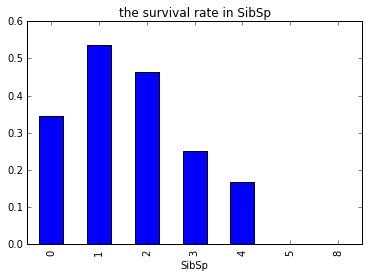

In [14]:
# 堂兄弟/妹个数 SibSp 的 分析
survival_rate('SibSp')

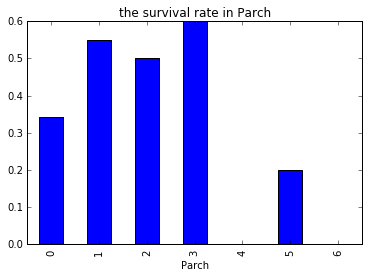

In [15]:
# 父母与小孩个数 Parch 的分析
survival_rate('Parch')

由图得知，堂兄弟/妹个数为1~2个时生存率较高；父母与小孩个数为3时生存率最高。

### 结论
泰坦尼克号的事故乘客的存活率比较低为*0.38*。船舱的等级越高，存活的几率越大，反之等级越低存活的可能性越小，这也与实际相符，因为高等级的船舱地理位置、逃生空间较好。乘客中男性的存活率较低为*0.19*，而女性的存活率达到*0.74*，说明逃生时执行了女士优先。0~5岁的乘客生存率较高，很可能是因为他们从登上船到上救生艇，就没有离开过父母的怀抱，在逃生时能够被优先照顾。堂兄弟/妹个数和父母与小孩个数的越少，生存率越高，是否体现为优先逃生，尽可能减少对家庭的破坏呢？这个还暂时无法确定。

**思考**：通过Age的直方图，得知用平均值填充缺失的数据，会导致接近平均值的年龄段乘客数量剧增，也应该会影响到分析的结果。Cabin客舱的数据缺失严重，这个数据应该对客舱的设计起到很大作用，什么位置的客舱逃生条件最好，或者怎么样设计出口才更合理等等。该数据样本的的乘客信息也比较少，缺乏阶级地位、身体素质等信息。所以本文只是分析了若干因素与生存率之间的相关性。